# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [102]:
m=1
p = 0.1#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [103]:
global compactified=false
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [104]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [105]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=3.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [106]:
print(N)

200.0

In [107]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [173]:
using Printf
include("./TMYangMills.jl");

In [174]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.015
the time step is 0.001


# Initial data of m β Ψ and Ψ,x

In [175]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initpi=zeros(L)
initderxchi=zeros(L)
initderpsi=zeros(L)
initxchi=zeros(L)

#state array is m beta psi xchi,u xchi,rORx psi,r xchi r
state_array=[initm initbeta initpsi initpi initderxchi initderpsi initxchi initX];
#attention:  in noncompactified code derxchi is (xchi),r. in compactified code derxchi is (xchi),x


#PSI,R
A=0.075*p*(1−q)
r0=0.75
sigma=0.25

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#XCHI
A=0.25*p*q
r0=0.3
sigma=0.1

initxchi[4:L-3] = init_xchi(initX1,r0,sigma,A)

state_array[:,7] = initxchi

####
#PSI FROM PSI,R, CHI,R FROM CHI
state_array[:,7]=parity(state_array[:,7])
state_array[4:L-3,5]=Der_array(state_array,7,initX)[4:L-3]#derivative(xchi_func, initX1; nu=1)#Der_array(state_array,7,initX)[4:L-3]
state_array[L-3,5]=state_array[L-4,5]

state_array[:,5]=secondparity(state_array[:,5])
aux=Der_array(state_array,5,initX)
aux[4]=0
aux[L-3]=aux[L-4]

# update interpolation of psi,x
derxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,5],  k=4);
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);
xchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);
derrxchi_func = Spline1D(initX[4:L-3], aux[4:L-3], k=4);

funcs=[derxchi_func derpsi_func xchi_func derrxchi_func];

In [176]:
y0=[0.0 0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:4] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:4] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

201×4 Matrix{Float64}:
 0.0  0.0  0.0   0.0
 0.0  0.0  0.0   3.6779e-6
 0.0  0.0  0.0   1.72041e-5
 0.0  0.0  0.0   4.85271e-5
 0.0  0.0  0.0   0.000112163
 0.0  0.0  0.0   0.000230383
 0.0  0.0  0.0   0.000433845
 0.0  0.0  0.0   0.000760915
 0.0  0.0  0.0   0.00125501
 0.0  0.0  0.0   0.00195977
 0.0  0.0  0.0   0.00291233
 0.0  0.0  0.0   0.0041357
 0.0  0.0  0.0   0.00563135
 ⋮              
 0.0  0.0  0.0  -3.29732e-6
 0.0  0.0  0.0  -3.2973e-6
 0.0  0.0  0.0  -3.29728e-6
 0.0  0.0  0.0  -3.29726e-6
 0.0  0.0  0.0  -3.29725e-6
 0.0  0.0  0.0  -3.29724e-6
 0.0  0.0  0.0  -3.29722e-6
 0.0  0.0  0.0  -3.29722e-6
 0.0  0.0  0.0  -3.29717e-6
 0.0  0.0  0.0  -3.29721e-6
 0.0  0.0  0.0  -3.29748e-6
 0.0  0.0  0.0  -3.29784e-6

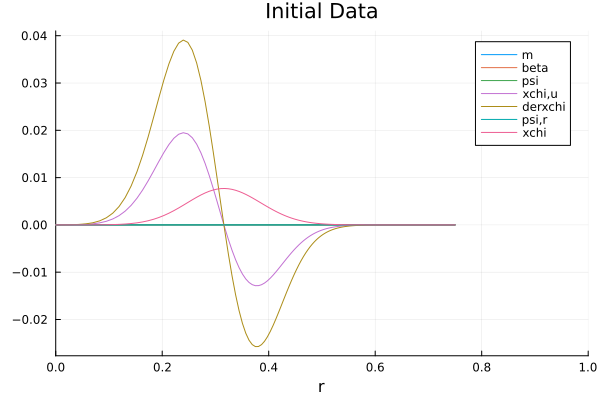

In [177]:
using Plots #showing initial data and the initial status of the horizon finder
plot(compactify.(initX[4:L-3]), state_array[4:L-3,1:7], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xchi,u" "derxchi" "psi,r" "xchi"],xlim=[0,1])

In [178]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [179]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "deruxchi", "derxchi", "derpsi", "xchi", "massloss"]


massloss = zeros(L)
massloss[4:L-3] = masslossfunc(state_array)[4:L-3]
print_muninn(files, 0, [state_array[:,1:7] massloss],res,"w", state_array[:,8])

In [180]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [181]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

14.999999999999996


In [182]:
using Base.Threads
Threads.nthreads()

4

In [183]:
dt=0.001/2^(m-1)

0.001

 ## Time evolution

In [184]:
state_array

207×8 Matrix{Float64}:
 0.0  0.0  0.0   0.0           9.90228e-5   0.0  -1.47035e-6   -0.045
 0.0  0.0  0.0   0.0           3.86742e-5   0.0  -4.88286e-7   -0.03
 0.0  0.0  0.0   0.0           1.28294e-5   0.0  -1.26652e-7   -0.015
 0.0  0.0  0.0   0.0           5.83259e-6   0.0   0.0           0.0
 0.0  0.0  0.0   3.6779e-6     1.28294e-5   0.0   1.26652e-7    0.015
 0.0  0.0  0.0   1.72041e-5    3.86742e-5   0.0   4.88286e-7    0.03
 0.0  0.0  0.0   4.85271e-5    9.90228e-5   0.0   1.47035e-6    0.045
 0.0  0.0  0.0   0.000112163   0.000222661  0.0   3.78824e-6    0.06
 0.0  0.0  0.0   0.000230383   0.000453934  0.0   8.70216e-6    0.075
 0.0  0.0  0.0   0.000433845   0.00085421   0.0   1.82639e-5    0.09
 0.0  0.0  0.0   0.000760915   0.00150064   0.0   3.55674e-5    0.105
 0.0  0.0  0.0   0.00125501    0.00248089   0.0   6.49523e-5    0.12
 0.0  0.0  0.0   0.00195977    0.00388345   0.0   0.000112095   0.135
 ⋮                                          ⋮                  
 0.0  0.0 

fixed grid

In [185]:
finaltime=3
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.001, t=0.10000000000000007 speed is 0.5000000000000001, dx/dt=15.0


iteration 200 dt is 0.001, t=0.20000000000000015 speed is 0.5000000000000001, dx/dt=15.0


iteration 300 dt is 0.001, t=0.3000000000000002 speed is 0.5000000000000001, dx/dt=15.0


iteration 400 dt is 0.001, t=0.4000000000000003 speed is 0.5000000000000001, dx/dt=15.0


iteration 500 dt is 0.001, t=0.5000000000000003 speed is 0.5000000000000001, dx/dt=15.0


iteration 600 dt is 0.001, t=0.6000000000000004 speed is 0.5000000000000001, dx/dt=15.0


iteration 700 dt is 0.001, t=0.7000000000000005 speed is 0.5000000000000001, dx/dt=15.0


iteration 800 dt is 0.001, t=0.8000000000000006 speed is 0.5000000000000001, dx/dt=15.0


iteration 900 dt is 0.001, t=0.9000000000000007 speed is 0.5000000000000001, dx/dt=15.0


iteration 1000 dt is 0.001, t=1.0000000000000007 speed is 0.5000000000000001, dx/dt=15.0


iteration 1100 dt is 0.001, t=1.0999999999999897 speed is 0.5000000000000001, dx/dt=15.0


iter